# Objective:
1. Use Tuned Model to Identify Accuracy Score


# Result:
- Training accuracy: 0.9754
- Valid acc 0.9246
- Test acc 0.9081485747192629

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dense, Activation, Dropout, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

# Read Data

In [3]:
fpath = '/content/mydrive/MyDrive/personal_data/Random_Data/REA/name_gender.csv'
fpath = 'name_gender_clean.csv'
import pandas as pd
df = pd.read_csv(fpath)
df

,Unnamed: 0,name,gender
0,0,crystin,F
1,1,clotie,F
2,2,onslow,M
3,3,geryl,F
4,4,omariyon,M
...,...,...,...
69437,69437,anniya,F
69438,69438,chanh,M
69439,69439,jacine,F
69440,69440,rony,M


# Custom Train Test Split

In [15]:
df_train = df[:int(len(df)*0.95)]
df_train.reset_index(drop = True,inplace=True)

df_test = df[int(len(df)*0.95):]
df_test.reset_index(drop = True,inplace=True)

In [18]:
names_train = df_train['name']
gender_train = df_train['gender']

names_test = df_test['name']
gender_test = df_test['gender']

maxlen = 20
labels = 2

# Label character index as numerical inputs to LSTM

In [21]:
vocab_train = set(' '.join([str(i) for i in names_train]))
vocab_train.add('END')
len_vocab_train = len(vocab_train)

char_index_train = dict((c, i) for i, c in enumerate(vocab_train))
char_index_train

{'y': 0,
 'c': 1,
 'e': 2,
 'd': 3,
 'j': 4,
 'q': 5,
 'o': 6,
 'b': 7,
 'z': 8,
 'w': 9,
 'f': 10,
 's': 11,
 'END': 12,
 'n': 13,
 'x': 14,
 'k': 15,
 'i': 16,
 'l': 17,
 'r': 18,
 'g': 19,
 'a': 20,
 ' ': 21,
 'v': 22,
 'u': 23,
 'p': 24,
 'm': 25,
 'h': 26,
 't': 27}

In [25]:
X_train = []
y_train = []

# Builds an empty line with a 1 at the index of character
def set_flag(i):
    tmp = np.zeros(len_vocab);
    tmp[i] = 1
    return list(tmp)

# Truncate names and create the matrix
def prepare_X(X):
    new_list = []
    trunc_train_name = [str(i)[0:maxlen] for i in X]

    for i in trunc_train_name:
        tmp = [set_flag(char_index[j]) for j in str(i)]
        for k in range(0,maxlen - len(str(i))):
            tmp.append(set_flag(char_index["END"]))
        new_list.append(tmp)

    return new_list



# Label Encoding of y
def prepare_y(y):
    new_list = []
    for i in y:
        if i == 'M':
            new_list.append([1,0])
        else:
            new_list.append([0,1])

    return new_list
X_train__ = prepare_X(names_train.values)
y_train__ = prepare_y(gender_train)

# Train Test split for Validation

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train__, y_train__)

# Tuned Model

In [28]:
model = Sequential()
model.add(Bidirectional(LSTM(512, return_sequences=True), backward_layer=LSTM(512, return_sequences=True, go_backwards=True), input_shape=(maxlen,len_vocab)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(512)))
model.add(Dropout(0.2))
model.add(Dense(2, activity_regularizer=l2(0.002)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [29]:
plot_model(model, to_file='model_2.png', show_shapes=True, expand_nested=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [30]:
callback = EarlyStopping(monitor='val_loss', patience=5)
mc = ModelCheckpoint('best_model_9.h5', monitor='val_loss', mode='min', verbose=1)
reduce_lr_acc = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='max')


# Fit Model

In [31]:
batch_size = 256
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=35, verbose=1, validation_data =(X_valid, y_valid), callbacks=[callback, mc, reduce_lr_acc])


Epoch 1/35


2022-04-17 17:05:32.485993: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-17 17:05:34.538170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 17:05:34.918823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 17:05:34.933778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 17:05:35.333426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 17:05:35.344315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 17:05:36.018863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

  1/194 [..............................] - ETA: 12:48 - loss: 0.6959 - accuracy: 0.4453

2022-04-17 17:05:36.324155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 17:05:36.344922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


194/194 [==============================] - ETA: 0s - loss: 0.4435 - accuracy: 0.7917

2022-04-17 17:06:45.832662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 17:06:45.969936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 17:06:45.986759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 17:06:46.181063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 17:06:46.193336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: saving model to best_model_9.h5
194/194 [==============================] - 81s 400ms/step - loss: 0.4435 - accuracy: 0.7917 - val_loss: 0.3306 - val_accuracy: 0.8614 - lr: 0.0010
Epoch 2/35
194/194 [==============================] - ETA: 0s - loss: 0.3178 - accuracy: 0.8670
Epoch 2: saving model to best_model_9.h5
194/194 [==============================] - 61s 314ms/step - loss: 0.3178 - accuracy: 0.8670 - val_loss: 0.3036 - val_accuracy: 0.8742 - lr: 0.0010
Epoch 3/35
194/194 [==============================] - ETA: 0s - loss: 0.2904 - accuracy: 0.8796
Epoch 3: saving model to best_model_9.h5
194/194 [==============================] - 61s 316ms/step - loss: 0.2904 - accuracy: 0.8796 - val_loss: 0.2864 - val_accuracy: 0.8831 - lr: 0.0010
Epoch 4/35
194/194 [==============================] - ETA: 0s - loss: 0.2767 - accuracy: 0.8874
Epoch 4: saving model to best_model_9.h5
194/194 [==============================] - 61s 315ms/step - loss: 0.2767 - accuracy: 0.8874 - val_loss: 0.

# Personal Telegram Notification once Training is done

In [32]:
import requests
def get_pass():
    pw = '1729173241:AAH-Xuwdpukn8bVu-nExWWUZsV5bw5cb360'
    chatid = '-516181344'
    
    dict_ = 'Code Passed'
    url1 = 'https://api.telegram.org/bot{}/sendMessage?chat_id={}&text={}&disable_web_page_preview=True&parse_mode=markdown'.format(
        pw, chatid, dict_)
    resp = requests.get(url1)


get_pass()

# Plot Train vs Validation ACcuracy

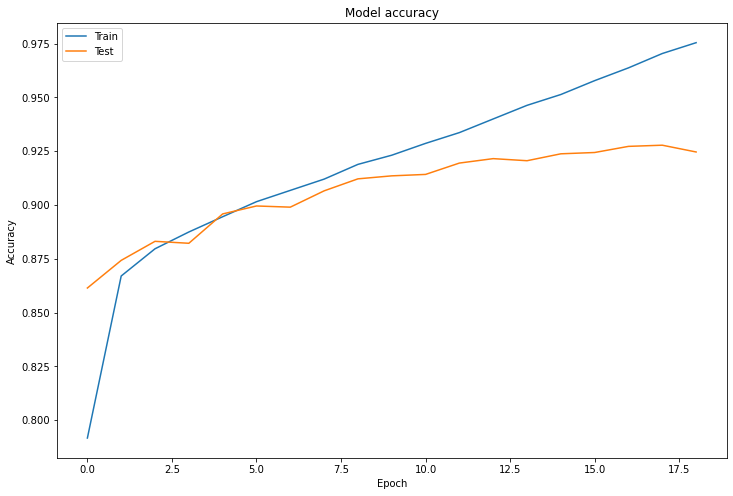

In [33]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Actual Prediction

In [40]:
test_names = df_test.name.to_list()

In [43]:
new_names = test_names
X_pred = prepare_X([e for e in new_names])

In [45]:
prediction = model.predict(X_pred)
prediction

array([[6.9339452e-03, 9.9306607e-01],
       [1.3303101e-01, 8.6696899e-01],
       [4.3748533e-03, 9.9562520e-01],
       ...,
       [9.8636956e-04, 9.9901372e-01],
       [9.9465394e-01, 5.3461101e-03],
       [5.6174397e-03, 9.9438256e-01]], dtype=float32)

In [48]:
print(prediction)

[[6.9339452e-03 9.9306607e-01]
 [1.3303101e-01 8.6696899e-01]
 [4.3748533e-03 9.9562520e-01]
 ...
 [9.8636956e-04 9.9901372e-01]
 [9.9465394e-01 5.3461101e-03]
 [5.6174397e-03 9.9438256e-01]]


# Let's see actual prediction on supposed Validation of accuracy: 0.9246 

In [51]:
return_results = []
k = 0
dict_answer=['M','F']
for i in prediction:
    if max(i) < 0.65:
        return_results.append([new_names[k], "N"])
    else:
        return_results.append([new_names[k], dict_answer[np.argmax(i)]])
    k += 1
return_results

[['jewliana', 'F'],
 ['lousie', 'F'],
 ['darlaine', 'F'],
 ['carmie', 'F'],
 ['llinda', 'F'],
 ['umang', 'M'],
 ['kobi', 'M'],
 ['deneisha', 'F'],
 ['corrah', 'F'],
 ['kaleil', 'M'],
 ['chih', 'F'],
 ['cherl', 'M'],
 ['zyien', 'M'],
 ['aroosa', 'F'],
 ['deloras', 'F'],
 ['aakira', 'F'],
 ['neamiah', 'M'],
 ['gorham', 'M'],
 ['lonzetta', 'F'],
 ['michaelallen', 'M'],
 ['rodert', 'M'],
 ['stevenray', 'M'],
 ['kenaz', 'N'],
 ['jailene', 'F'],
 ['jazmin', 'F'],
 ['danyon', 'M'],
 ['sixten', 'M'],
 ['dilbert', 'M'],
 ['ayzen', 'M'],
 ['delysa', 'F'],
 ['jonathanmichael', 'M'],
 ['kaila', 'F'],
 ['camillo', 'M'],
 ['ramonte', 'M'],
 ['brentson', 'M'],
 ['darshanna', 'F'],
 ['anisty', 'F'],
 ['kegan', 'M'],
 ['akif', 'M'],
 ['arlin', 'M'],
 ['jawane', 'M'],
 ['khanye', 'M'],
 ['emmelie', 'F'],
 ['prithvi', 'M'],
 ['carvin', 'M'],
 ['acelin', 'F'],
 ['harshi', 'M'],
 ['cyrill', 'M'],
 ['huai', 'M'],
 ['clu', 'M'],
 ['cedra', 'F'],
 ['akeyah', 'F'],
 ['altrina', 'F'],
 ['cesidio', 'M'],
 ['tris

In [54]:
results_gender = []
for i in return_results:
    results_gender.append(i[1])

# Actual Prediction

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(results_gender, df_test.gender.to_list())

0.9081485747192629

In [2]:
path_to_save = 'REA_2_KERAS_1.h5'

# Save Model

In [37]:
model.save(path_to_save)

# Load Model

In [3]:
# https://www.tensorflow.org/guide/keras/save_and_serialize

from tensorflow import keras
model = keras.models.load_model(path_to_save)
model

2022-04-16 11:58:47.931090: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-16 11:58:47.931590: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
